## World population Analysis

This is more of a free project, where I will try to apply the different data analysis and machine learning skills that
I have learnt in recent times. It is just a simple dataset with world population from 2014 to 2024 for different countries.
There is no question that I am trying to answer here, but instead I will try to find interesting insights from the available dataset.

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL = 'https://data.worldbank.org/indicator/SP.POP.TOTL'
df = pd.read_csv('population1.csv', delimiter=',', quotechar='"', engine='python', skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


### Data exploration

In [356]:
df.shape  # (266, 69)
df = df.dropna(axis = 1, how='all')
df = df.dropna(axis = 0, how = 'all')
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,1.154482e+08,1.170540e+08,1.192163e+08,1.218881e+08,1.245838e+08,1.273114e+08,1.301584e+08,1.330130e+08,1.359428e+08,1.389708e+08,...,1.353156,1.260634,1.179204,1.169711,1.133876,1.073112,0.853857,1.108163,1.114385,40.939892
std,3.626524e+08,3.671661e+08,3.738304e+08,3.824609e+08,3.911398e+08,3.999257e+08,4.091871e+08,4.184362e+08,4.279508e+08,4.378240e+08,...,1.497525,1.355183,1.374931,1.343793,1.323687,1.349321,1.502468,1.913080,1.499427,42.443099
min,2.715000e+03,2.970000e+03,3.264000e+03,3.584000e+03,3.922000e+03,4.282000e+03,4.664000e+03,5.071000e+03,5.500000e+03,5.631000e+03,...,-4.187902,-2.497929,-5.271862,-3.967538,-4.845607,-7.240202,-10.351563,-7.336284,-8.078026,-33.958979
25%,5.152028e+05,5.255230e+05,5.363018e+05,5.475875e+05,5.593638e+05,5.675750e+05,5.711695e+05,5.779525e+05,5.825170e+05,5.861185e+05,...,0.444204,0.395898,0.266043,0.338746,0.334163,0.216306,0.128832,0.211031,0.263929,11.726574
50%,3.659633e+06,3.747132e+06,3.831900e+06,3.919710e+06,4.010150e+06,4.102976e+06,4.198738e+06,4.297792e+06,4.396290e+06,4.503420e+06,...,1.178892,1.198758,1.189147,1.168418,1.058859,1.030933,0.872669,0.989449,0.996267,31.940677
75%,2.686293e+07,2.761326e+07,2.837302e+07,2.915448e+07,2.995223e+07,3.075921e+07,3.147516e+07,3.203946e+07,3.247057e+07,3.277149e+07,...,2.254841,2.235598,2.191713,1.987790,2.003239,2.015536,1.893678,2.030327,2.079045,68.201077
max,3.021529e+09,3.062769e+09,3.117373e+09,3.184063e+09,3.251253e+09,3.318998e+09,3.389087e+09,3.459014e+09,3.530702e+09,3.604812e+09,...,8.960727,5.653776,5.435737,5.987951,5.014860,5.892808,3.724899,20.774144,6.744773,311.794930


In [206]:
df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960                   2
                      ..
Growth Rate 2020       1
Growth Rate 2021       1
Growth Rate 2022       1
Growth Rate 2023       1
Overall Growth Rate    1
Length: 94, dtype: int64

Lets calculate the growth rate since the year 2000:

In [224]:
for year in range(2000, 2024):
    prev_year = str(year - 1)
    current_year = str(year)
    growth_rate_column = f"Growth Rate {year}"
    df[growth_rate_column] = ((df[current_year] - df[prev_year]) / df[prev_year]) * 100


df['Overall Growth Rate'] = ((df['2023'] - df['2000']) / df['2000']) * 100

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,1.028959,0.760847,0.007358,0.159102,0.270871,-0.564087,-0.816857,-0.362117,0.045662,18.513490
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,2.733524,2.675920,2.677279,2.771987,2.759057,2.736283,2.684849,2.626659,2.552859,84.781843
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,3.169140,2.568143,2.848143,2.953588,3.029368,3.203862,2.384073,1.446060,2.158561,105.931881
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,2.736122,2.708956,2.661087,2.565989,2.470061,2.417945,2.391989,2.359680,2.414901,85.257107
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,3.670842,3.641165,3.604038,3.513549,3.445927,3.321943,3.232468,3.192941,3.128599,126.923145


Next we will order the countries based on the highest growth rates for the last ten years.

In [312]:
ordered = df.sort_values(by = 'Overall Growth Rate', ascending = False)
ordered.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
200,Qatar,QAT,"Population, total",SP.POP.TOTL,36010.0,39680.0,44630.0,50380.0,56867.0,64065.0,...,8.960727,5.653776,2.773672,1.371425,2.244439,5.892808,-10.351563,6.084969,-0.048959,311.794930
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,131334.0,137989.0,144946.0,152211.0,159692.0,167103.0,...,5.531364,5.054039,3.224700,1.338751,1.060096,-0.473725,1.852072,5.220022,4.057319,200.086616
88,Equatorial Guinea,GNQ,"Population, total",SP.POP.TOTL,269807.0,274896.0,280286.0,285965.0,291942.0,298238.0,...,3.864403,3.732178,3.594384,3.457894,3.325555,2.771622,2.465412,2.544880,2.439861,162.704986
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,311060.0,345945.0,384995.0,427694.0,473115.0,521174.0,...,4.601847,4.420882,3.764046,4.060424,2.747787,-0.946556,-0.895446,5.246161,5.747223,148.293736
22,Bahrain,BHR,"Population, total",SP.POP.TOTL,165477.0,172346.0,179349.0,186501.0,193816.0,200866.0,...,4.241717,3.897186,5.435737,0.131569,-1.286349,-0.778565,2.184548,1.351268,3.434527,147.349988


In [354]:
ordered.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
155,Marshall Islands,MHL,"Population, total",SP.POP.TOTL,14703.0,15219.0,15755.0,16302.0,16852.0,17402.0,...,-2.000161,-2.235656,-2.473328,-2.673601,-2.822127,-2.956348,-3.135391,-3.118428,-3.118996,-23.427208
24,Bosnia and Herzegovina,BIH,"Population, total",SP.POP.TOTL,3281381.0,3348035.0,3407532.0,3461942.0,3513441.0,3562834.0,...,-1.298463,-1.294230,-1.276158,-1.215686,-1.224299,-1.380468,-1.650083,-1.235937,-0.615607,-23.431530
248,Ukraine,UKR,"Population, total",SP.POP.TOTL,42824093.0,43399766.0,43943674.0,44462372.0,44951156.0,45386892.0,...,-0.407819,-0.367073,-0.396325,-0.499898,-0.556193,-0.617126,-0.853567,-7.336284,-8.078026,-23.859203
164,Northern Mariana Islands,MNP,"Population, total",SP.POP.TOTL,8736.0,8995.0,9280.0,9595.0,9925.0,10264.0,...,-1.272567,-1.438444,-1.603214,-1.765448,-1.931658,-1.248727,-1.155109,-1.917878,-2.029168,-33.958979
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Next we will consider the different blocks of countries based on Population growth

First we will consider nordic countries based on the Growth Rate

Text(0.5, 1.0, 'Nordic countries Overall Poulation Growth Rate in Last 10 years')

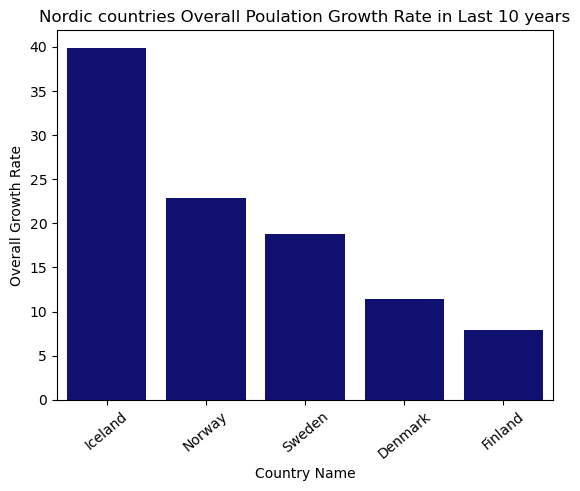

In [276]:
import seaborn as sns

nordics = ordered.loc[ordered['Country Name'].isin(['Finland', 'Sweden', 'Denmark', 'Iceland', 'Norway'])]
sns.barplot(x = 'Country Name', y = 'Overall Growth Rate', data = nordics, color = 'navy')
plt.xticks(rotation=40)
plt.title('Nordic countries Overall Poulation Growth Rate in Last 10 years')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,0.738934,0.727308,0.634649,0.527824,0.45642,0.97371,0.157467,0.368149,0.493137,18.695787


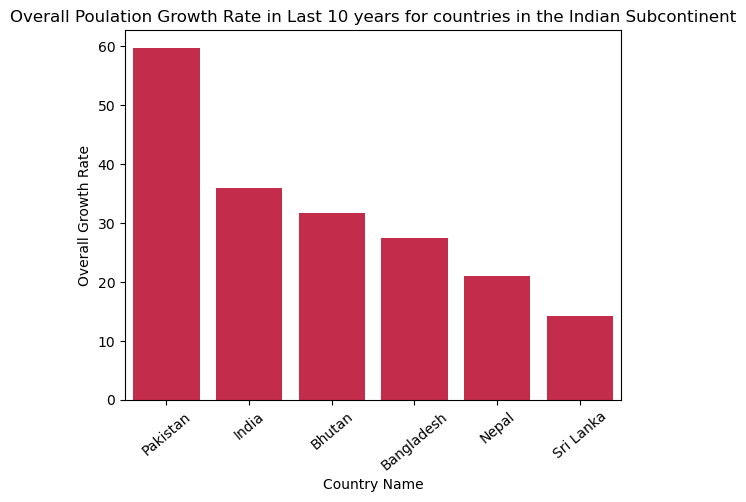

In [278]:
Indian_subcont = ordered.loc[ordered['Country Name'].isin(['India', 'Pakistan', 'Nepal', 'Bhutan', 'Bangladesh', 'Sri Lanka'])]
sns.barplot(x = 'Country Name', y = 'Overall Growth Rate', data = Indian_subcont, color = 'crimson')
plt.xticks(rotation=40)
plt.title('Overall Poulation Growth Rate in Last 10 years for countries in the Indian Subcontinent')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Certain countries have different names in geopandas dataset and in our dataset
# whilst we won't solve for all the countries, we will fix it for some obvious ones

name_mapping = {
    'Russian Federation': 'Russia',
    'United States': 'United States of America',
    'Turkiye': 'Turkey',
    'Iran, Islamic Rep.': 'Iran',
    'Venezuela, RB': 'Venezuela'
}

ordered['Country Name'] = ordered['Country Name'].replace(name_mapping)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(ordered, how='left', left_on='name', right_on='Country Name')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1, color='black')

growth_rate_min = world['Overall Growth Rate'].min()
growth_rate_max = world['Overall Growth Rate'].max()

max_abs_value = max(abs(growth_rate_min), abs(growth_rate_max))
vmin, vmax = -max_abs_value, max_abs_value

world.plot(column='Overall Growth Rate', cmap='RdYlBu', legend=True, ax=ax, 
           missing_kwds={"color": "lightgrey", "label": "No Data"}, 
           vmin=0.5*vmin, vmax=0.5*vmax)

plt.title('World Heatmap of Population Growth Rate', fontsize=16)

legend = ax.get_legend()
if legend:
    legend.set_bbox_to_anchor((1.2, 0.5))  
    legend.set_title("Growth Rate")

plt.tight_layout()
plt.show()

Mos 

### Focus on Finland

In [280]:
Finland_data = ordered[ordered['Country Name'] == 'Finland']
Finland_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Growth Rate 2015,Growth Rate 2016,Growth Rate 2017,Growth Rate 2018,Growth Rate 2019,Growth Rate 2020,Growth Rate 2021,Growth Rate 2022,Growth Rate 2023,Overall Growth Rate
75,Finland,FIN,"Population, total",SP.POP.TOTL,4429634.0,4461005.0,4491443.0,4523309.0,4548543.0,4563732.0,...,0.329927,0.287835,0.234946,0.132729,0.110252,0.143744,0.207504,0.272315,0.50044,7.876459


Lets first visualize the population accross the last 10 years.

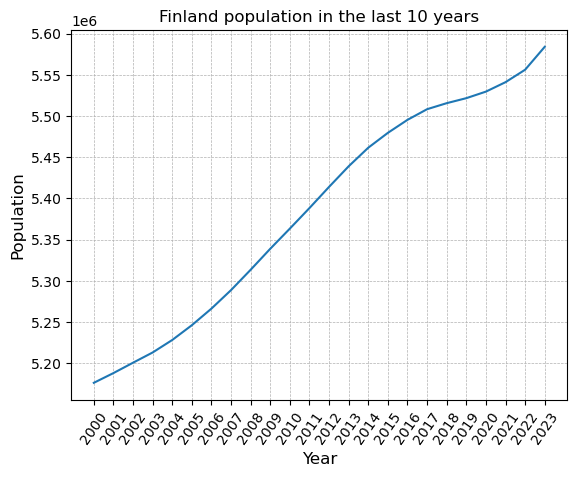

In [308]:
years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
         '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 
         '2020', '2021', '2022', '2023']
population = Finland_data.loc[:, years].values.flatten()

plt.plot(years, population)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title('Finland population in the last 10 years')
plt.xticks(rotation = 55)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

We can do a simple Linear Regression here to predict the future poulation.

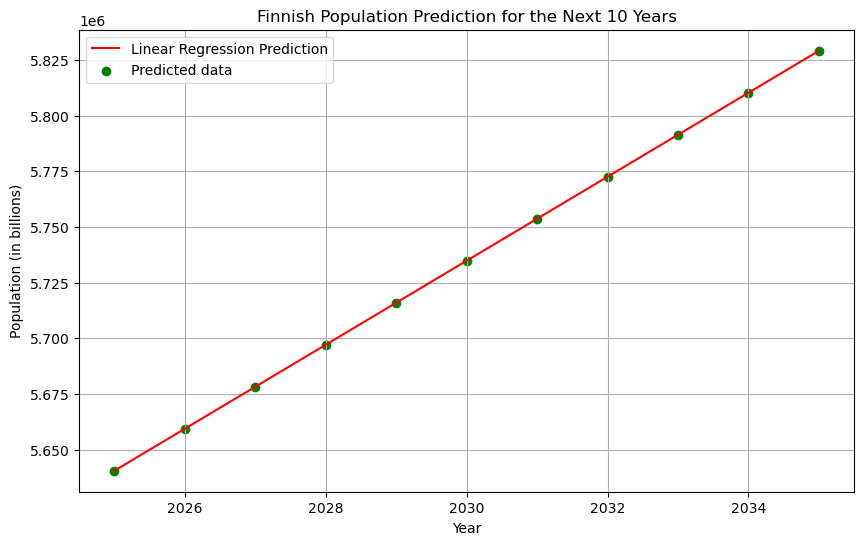

In [289]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

years_ = np.array(years, dtype=float).reshape(-1, 1) 
population_ = np.array(population, dtype=float)  

model = LinearRegression()
model.fit(years_, population_)

future_years = np.array([i for i in range(2025, 2036)], dtype=float).reshape(-1, 1)
future_population = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(future_years, future_population, color='red', label='Linear Regression Prediction')  
plt.scatter(future_years, future_population, color='green', label='Predicted data')  

plt.xlabel("Year")
plt.ylabel("Population (in billions)")
plt.title("Finnish Population Prediction for the Next 10 Years")
plt.legend()
plt.grid(True)
plt.show()

From this we may predict the population at the end of 2035.

In [299]:
by_2035 = model.coef_*2024 + model.intercept_
by_2035[0]

5621596.246376809